[Back to Lecture Overview](Overview.ipynb)

# Object Oriented Programming in Python
* Author: Johannes Maucher
* Last Update: 11.07.2017

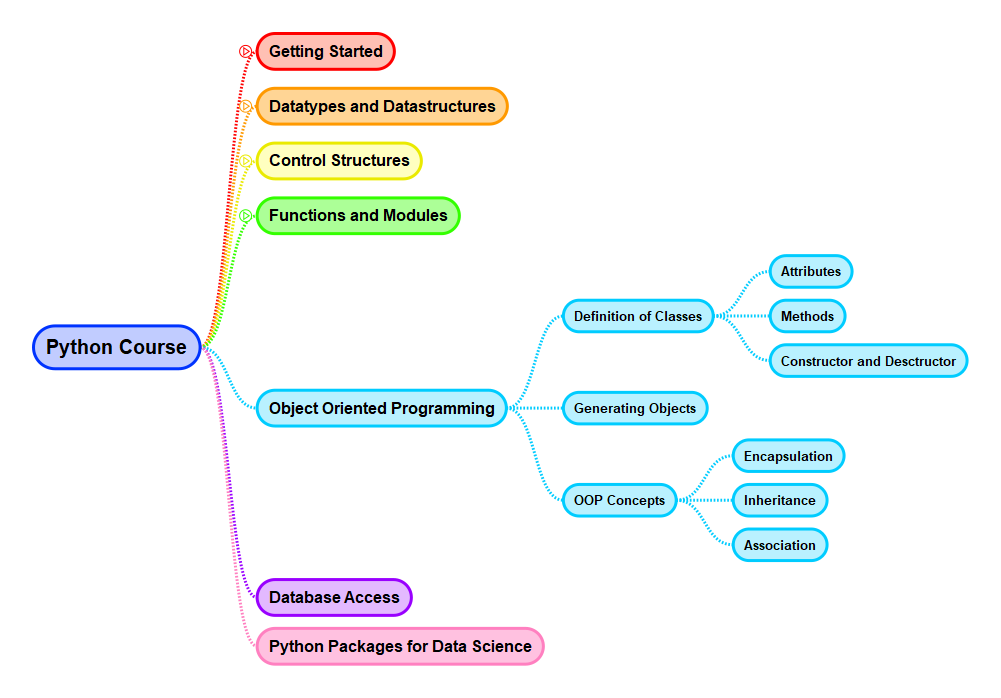

In [1]:
from IPython.display import Image
Image(filename="../../Pics/DS_Python_OOP_All.png")

In the [lecture on functions](#05Functions) the motivation for a **modular software design** has already been described: A modular design increases readability, reliability, maintainability and thus the general quality of the software. Splitting code in smaller reusable and manageable functions is one way to realize modularity. An other, more elaborated and more comprehensive approach is **object oriented programing (OOP)**. An object oriented software design consists of *objects* that interact with one another. Actually, objects are not defined itself, but *classes*. **A class can be considered as a blueprint and objects are concrete instances of these blueprints**. An arbitrary number of objects of a given class can exist in the program. Objects have
* a **type**: this is the class from which they are instantiated
* **data**, which is stored in the objects **attributes**
* **functions**: These functions, defined inside classes, are called **methods**. They can access and/or modify the attributes of the same object and of **associated objects** .

Actually in Python all datatypes are objects. For example strings have a certain definition for the class `string`, this defintion contains attributes (the data, which is stored in a string-variable) and functions, that operate on this data. In the first line of the following code-cell an object of class `string` is instantiated. In the second line a method, defined for this class is called and the third line provides the class-name, of the object, refered by `myString`.

In [2]:
myString=str("This is my text") #A short-cut of this is just myString="This is my text"
print(myString.count('i'))
print(type(myString))

2
<class 'str'>


From this point of view, object oriented programming allows the definiton of arbitrary types (aka classes) by the user. Python standard types are just classes, that have already been defined by the Python developers. 

A user-defined type (=class) could for example be a class `Person` 

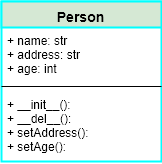

In [3]:
Image(filename="../../Pics/umlClassPerson.png")

Objects of this class have the attributes (=data) `name`, `address`, `age` and `friends`. Methods that can operate on this data are for examle `connectFriend()`, `getFriends()`, `getName()`, etc. Below it will be shown how such classes are defined and how objects of this can be generated.

## Definition of classes
### Head Line of Class Definiton
In Python classes are defined in files with the extension *.py*. These files are called *modules* and can contain the definitions of one or more classes and/or one or more functions. 

The definition of a class starts with the keyword `class`, followed by the name of the class and a colon:
```
class myFirstClass:
```

As will be shown later, classes can be inherited from other classes (the concept of inheritance is described in [subsection Inheritance](#Inheritance)) In this case the name of the class is followed by the name of the class(es) from which it is inherited:
```
class myFirstClass(nameOfParent1,nameOfParent2,...):
```
In Python all classes are inherited from the root-class `object`. This can be made explicit by writing the head line of classes, which do not inherit from other classes as follows:
```
class myFirstClass(object):
```

The head line of the class-definition is followed by it's body. The body contains the definition of attributes and methods and must be indented. 
In the development process one often specifies the name of the classes, but cares only later for the concrete implementation (attributes and methods). In this case the definition of a head line alone would cause a *syntax error* if the file is compiled. However, the keyword `pass` can be applied to prevent this error. The code

```
class myFirstClass:
    pass
```
does not yield a syntax error. The keyword `pass` can not only be applied for incomplete class-definitions but also for other constructs such as functions, methods, loops, etc. 


### Methods
Methods are functions, that are defined within a class-definition. This means that they can be called only for objects of this class. Methods are visible and accessible for objects of classes within they are defined. From outside the method can only be called over a reference to an object of this class, if the method is declared to be `public`. Methods, which are declared to be `private` can not be accessed from outside.

In Python the first argument in the argument-list of each method must be `self`. Via `self` the method gets a reference to the object for which it is called. In the following code-cell a class with two methods, which are not yet specified, is defined:

In [4]:
class myFirstClass:
    def method1(self,arg1,arg2):
        pass
    def method2(self,arg1,arg2,arg3):
        pass

### Attributes
Attributes are variables, which are defined inside a class definition. There are two types of attributes: 
1. **Instance Attributes** (or: Object Variables) are variables which can have different values for all objects of a class. For example a class `Person` may have the instance attribute `age`. Each object of this class (modell of a concrete person) has it's own age-value. Object variables are owned by each individual object, i.e. each object has its own copy of the variable.
2. **Class Attribures** are shared by all objects (instances) of a given class. They can be accessed and changed by any object of the class. If one object modifies the value of a class attribute, all other objects of the same class see the same modified value. For example `person_count` may be a class-attribute of the class `Person`. If this attribute is incremented whenever a new person object is instantiated, all person objects know how much persons currently exists.

Usually there exists many instance attributes but no, or only a few class attributes. Instance attributes are defined within the `__init__()`-method (=*constuctor* of the class; see below) of the class. The name of each instance attribute must be preceded by `self.` Class attributes are defined at the top of the class-definition body.  

### Constructor and Destructor
If a new object of a defined class is instantiated, a set of object-specific instance-attributes is generated and initialized for this object. This process is performed in a specific method - the **constructor**. In Python this constructor is specified in the `__init()__`-method, whose head line is:
```
def __init__(self):
```
As with other methods, this head line is followed by the indented body of the method. The body of the constructor assigns and initializes instance-variables. For example if the class `Persons` has the instance attributes `name`, `age` and `address`, the constructor of the class could be:
```
def __init__(self):
    self.age=0
    self.name=""
    self.address=""
```
The `__init__()`-method is private and can not be called from outside. Actually it is called automatically if a new object is instantiated. As for other methods, a set of arguments can be defined for the `__init__()`-method. At object-instantiation concrete parameters are passed to these arguments. Typically these parameters define the intial-values of the instance-variables. Key-word arguments and default-values can be applied in the same way as for all other methods. In the case of the `Person`-class a suitable constructor would be

```
def __init__(self,ageInit,nameInit,addressInit):
    self.age=ageInit
    self.name=nameInit
    self.address=addressInit
```

A concrete `Person`-object could then be instantiated as follows:

```
ben=Person(ageInit=29,nameInit="Ben Miller", addressInit="29th High Street, Brighton")
```

> **Note:** Strictly speaking the `__init__()`-method in Python is not a constructor as available in other programming languages. But it behaves similar as these constructors. The difference is, that in Python the object is already constructed at the time where the `__init__()`-method is executed. A *true* constructor generates the objects itself. 

As with constructors Python also doesn't have a *real* destructor, but something that behaves similar to destructors. This is the `__del__()`-function. This method is called when an object is about to be destroyed. A typical routine implemented in a destructor is to decrement the object counter of its class, if such a counter is implemented as class-attribute.

A `Person`-class with class-variable `person_counter`, a constructor and a destructor could be implemented as follows:

In [5]:
class Person(object):
    person_counter=0
    def __init__(self,ageInit,nameInit,addressInit):
        self.age=ageInit
        self.name=nameInit
        self.address=addressInit
        Person.person_counter+=1
        print("Person Object generated")
        
    def setAddress(self,address):
        self.address=addressInit
    
    def setAge(self,age):
        self.age=age
        
    def __del__(self):
        Person.person_counter-=1
        print("Person Object deleted")

Objects of this class can be instantiated as follows:  

In [6]:
ben=Person(ageInit=29,nameInit="Ben Miller", addressInit="29th High Street, Brighton")
peter=Person(ageInit=23,nameInit="Peter Boyd", addressInit="5th Avenue, New York")
ceo=ben
ben.setAge(30)
print(ceo.age)

Person Object generated
Person Object generated
30


In [7]:
print(Person.person_counter)

2


Instance attributes of a `Person`-object and the class attribute `person_counter`-can be accessed as follows:

In [8]:
print(ben.age)
print(ben.name)
print(ben.address)
print(Person.person_counter)
print(type(ben))

30
Ben Miller
29th High Street, Brighton
2
<class '__main__.Person'>


Using the `del`-command, objects can be deleted. Note that an object is deleted only if all references to this object are deleted.

In [9]:
del ben

In [10]:
print(Person.person_counter)

2


In [11]:
del ceo

Person Object deleted


In [12]:
print(Person.person_counter)
del peter
print(Person.person_counter)

1
Person Object deleted
0


>**Question:** Why does `del ben` not yield an object-deletion? When is this object deleted?

## Encapsulation

Encapsulation is an object-oriented programming concept that binds together the data and functions, that manipulate the data, and that keeps both safe from outside interference and misuse. Data encapsulation led to the important OOP concept of data hiding. If a class does not allow calling code to access internal object data and permits access through methods only, this is a strong form of abstraction or information hiding known as encapsulation (Source: [https://en.wikipedia.org/wiki/Object-oriented_programming#Encapsulation](https://en.wikipedia.org/wiki/Object-oriented_programming#Encapsulation)).

For managing access on internal data, attributes and methods can be declared to be either `public`, `private` or `protected`:

* **public** attributes and methods are directly accessible from outside via a the reference on the object. E.g. in the example of the `Person`-class, as introduced above, all attributes are implicitly declared *public*. Attribute values can directly be accessed via a reference to the object, e.g. `ben.age` and methods can be called in the same way, e.g. `ben.setAge(30)`. In Python all attributes and methods, whose name do not start with an underscore `_` are implicitly declared to be public. 
* **private** attributes and methods cannot be accessed directly from outside. All attributes and methods, whose name start with a double underscore `__` are implicitly declared to be private. 
* **protected** attributes and methods are declared implicitily by prefixing a single underscore `_`. However, this is just a convention, which shall remind developers not to access these attributes and methods directly. Technically it is the same as *public*.


Below a new class `User` is defind. This class contains two *private* attributes `__username` and `__pw`. These two attributes cannot be accessed directly from outside. Indirectly the values of these attributes can be set from outside via the public method `setAccount()`.

In [13]:
class User(object):
    person_counter=0
    def __init__(self,ageInit,nameInit,addressInit,username="",pw=""):
        self.age=ageInit
        self.name=nameInit
        self.address=addressInit
        self.__username=username
        self.__pw=pw
        type(self).person_counter+=1
        print("User Object generated")
    
    def setAccount(self,username,pw):
        self.__username=username
        self.__pw=pw
        
    def __del__(self):
        type(self).person_counter-=1
        print("User Object deleted")

Generate instances of class `User`:

In [14]:
ben=User(ageInit=29,nameInit="Ben Miller", addressInit="29th High Street, Brighton")
peter=User(ageInit=23,nameInit="Peter Boyd", addressInit="5th Avenue, New York")

User Object generated
User Object generated


Call method `setAccount()` to set `__username` and `__pw`:

In [15]:
ben.setAccount('userben','123')

Try to access a private attribute directly from outside yields an error:

In [16]:
print(ben.__username)

AttributeError: 'User' object has no attribute '__username'

>**Question:** Compare the two classes `Person` and `User`. How are they related. Is it efficient to define classes, which are related in this way in a totally independent manner? How can it be improved?

## Inheritance
In the example above a class `User` has been defined, which is a **specification** of the class `Person`. There exists a **is-a**-relation between the classes: a `User` is a `Person`. Whenever, classes are related in this way it is inefficient to implement them independently, as in the example above. It is much more efficient to exploit the concept of inheritance in such cases. This concept allows to define in the more specific class only the attributes and methods, in which it differs from the more general class. All attributes and methods, which are contained in both classes must only be defined in the general class. The more general class, from which the more specific class inherits is called the **super-class**, and the more specific class is called the **sub-class**.

In Python there exists a root class, called `object`, from which all other classes are inherited. The complete inheritance relations of the example in this subsection can be visualized by the following UML-diagram: 


In [ ]:
Image(filename="../../Pics/umlClassInheritance.png")

As already mentioned above, in the definition of a class, which inherits from another class, the name of the super-class must be written into the parenthesis after the name of the current class. For example:
```
class myFirstClass(nameOfParent):
```
Here, we just consider the case of simple inheritance, i.e. a class inherits only from one direct super-class. However, Python supports multiple inheritance. Then the name of all direct super-classes must be written into the parenthesis of the definition's head line.

In sub-classes methods of super-classes can be **overwritten**. This means that in both classes methods with the same name, but distinct implementations can be defined. In this case the implementation as defined in the **sub-class** overwrites the implementation of the superclass, i.e. the implementation in the super-class is ignored. In the following definition of class `UserD` the definition of the `__init__()`-method from the super-class `Person` is overwritten, but within the  `__init__()`-method of the sub-class, the `__init__()`-method of the super-class is called (similar for the `__del__()`-method).


In [ ]:
class UserD(Person):
    userD_counter=0
    def __init__(self,ageInit,nameInit,addressInit,username="",pw=""):
        self.__username=username
        self.__pw=pw
        Person.__init__(self,ageInit,nameInit,addressInit)
        type(self).userD_counter+=1
    
    def setAccount(self,username,pw,token=""):
        if token=="1234":
            self.__username=username
            self.__pw=pw
        else:
            return "Edit Permission Denied"
        
    def getAccount(self,token=""):
        if token=="1234": #only users with valid token can query credentials
            return self.__username, self.__pw
        else:
            return "Query Permission Denied"
        
    def __del__(self):
        type(self).userD_counter-=1
        Person.__del__(self)

In [ ]:
ben=UserD(ageInit=29,nameInit="Ben Miller", addressInit="29th High Street, Brighton")
peter=UserD(ageInit=23,nameInit="Peter Boyd", addressInit="5th Avenue, New York")

In [ ]:
print(ben.age)
print(ben.name)
print(ben.address)
print(type(ben))

In [ ]:
print(UserD.userD_counter)
print(Person.person_counter)

In [ ]:
print(ben.__username)

In [ ]:
ben.setAccount("bennyboy","xyz",'1234')

In [ ]:
ben.getAccount('1234')

In [ ]:
del peter,ben

In the following subsection another class, `AccountManager` will be inherited from the class `Person`. The corresponding UML diagram is then:

In [ ]:
Image(filename="../../Pics/umlClassInheritance2.png")

## Association
The concept of inheritance allows to efficiently derive more specific classes from more general classes. Inheritance always refers to **is-a**-relations between classes. 

However, this is not the only relevant relation type in UML. Classes and objects can be **associated** for example by a **has**-relation: An object of class A *has* one or more objects of class B.    

This type of association is implemented in this subsection. First a class `AccountManager` is `inherited` from the `Person`-class. Each `AccountManager`-object shall be responsible for one or many `UserD`-objects. For this the `AccountManager` has a list, which stores the corresponding `UserD`-objects. Moreover, methods must be defined to add new and delete old `UserD`-objects.

The **association** between a `AccountManager` and is `UserD`-objects is implemented by a reference (a list of references) in the `AccountManager`-object, which points to `UserD`-objects.  

In [ ]:
class AccountManager(Person):
    accountManager_counter=0
    def __init__(self,ageInit,nameInit,addressInit,username="",pw=""):
        self.__customerList=[]
        Person.__init__(self,ageInit,nameInit,addressInit)
        type(self).accountManager_counter+=1
    
    def addCustomer(self,newUser):
        if not newUser in self.__customerList:
            self.__customerList.append(newUser)
        else:
            print("User already in list")
        
    def delCustomer(self,User):
        if User in self.__customerList:
            self.__customerList.remove(User)
        else:
            print("Unknown user can not be deleted")
        
    def getCustomerList(self):
        return self.__customerList
        
    def __del__(self):
        type(self).accountManager_counter-=1
        Person.__del__(self)

In [ ]:
ben=UserD(ageInit=29,nameInit="Ben Miller", addressInit="29th High Street, Brighton")
peter=UserD(ageInit=23,nameInit="Peter Boyd", addressInit="5th Avenue, New York")
mrX=AccountManager(ageInit=23,nameInit="Peter Boyd", addressInit="5th Avenue, New York")

In [ ]:
print(UserD.userD_counter)
print(AccountManager.accountManager_counter)
print(Person.person_counter)

Create association betwenn `AccountManger`-object and `UserD`-objects:

In [ ]:
mrX.addCustomer(ben)

In [ ]:
mrX.addCustomer(peter)

In [ ]:
cl = mrX.getCustomerList()
print([c.name for c in cl])

In [ ]:
del mrX
del ben
del peter

## Exercises
[Exercise on Object Oriented Programming in Python](../Assignments/Ass06ObjectOrientedProgramming.ipynb)